### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가

In [274]:
!pip install matplotlib
!pip install numpy

In [275]:
import os
print(os.getcwd())

c:\here\python_basic\data-analysis-practice-main


In [276]:
#라이프로리 선언
import numpy as np
import pandas as pd

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [277]:

#２。 결측값 확인
isnull = df.isna().sum()

# 결측값이 있는 열 출력
print(isnull[isnull > 0])

# 모든 값이 결측값인 행 제거
df = df.dropna(how='all')
df.info()

# 처리 결과 확인
print(df.head())

Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     120 non-null    int64         
 1   Product     120 non-null    object        
 2   Category    120 non-null    object        
 3   Quantity    120 non-null    int64         
 4   Price       120 non-null    int64         
 5   CustomerID  120 non-null    int64         
 6   Birthdate   120 non-null    object        
 7   OrderDate   120 non-null    datetime64[ns]
 8   Country     120 non-null    object        
 9   Week        120 non-null    period[W-SUN] 
 10  Sales       120 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(4), period[W-SUN](1)
memory usage: 10.4+ KB
   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1     

In [278]:
# ３。각 열의 데이터 타입 
print(df.dtypes)

# OrderDate 열을 datetime 형식으로 변환
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# 변환 결과 확인
print(df.dtypes)

OrderID                int64
Product               object
Category              object
Quantity               int64
Price                  int64
CustomerID             int64
Birthdate             object
OrderDate     datetime64[ns]
Country               object
Week           period[W-SUN]
Sales                  int64
dtype: object
OrderID                int64
Product               object
Category              object
Quantity               int64
Price                  int64
CustomerID             int64
Birthdate             object
OrderDate     datetime64[ns]
Country               object
Week           period[W-SUN]
Sales                  int64
dtype: object


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [279]:
#선언부가 계속 못읽혀서 다시 지정정
!pip install matplotlib
!pip install numpy

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [535]:
df = pd.read_csv('./data/ecommerce_sales_data.csv', encoding='euc-kr')

### 1

In [282]:
#１。매출액 계산 및 새로운 열 추가
df['TotalRevenue'] = df['Quantity'] * df['Price']
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,Week,Sales,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,2024-06-10/2024-06-16,185000,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,2023-11-13/2023-11-19,100000,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,2023-10-09/2023-10-15,32000,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,2024-07-15/2024-07-21,8000,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,2024-01-15/2024-01-21,78000,78000


In [283]:
print(df.columns)

Index(['OrderID', 'Product', 'Category', 'Quantity', 'Price', 'CustomerID',
       'Birthdate', 'OrderDate', 'Country', 'Week', 'Sales', 'TotalRevenue'],
      dtype='object')


In [284]:
#날짜 데이터 변환
df['date'] = pd.to_datetime(df['OrderDate'])

In [285]:
#매출 컬럼 생성
df['Sales'] = df['Price'] * df['Quantity']

In [286]:
#인덱스 설정
df.set_index('date', inplace=True)


### 2

In [287]:
#월별 매출 집계
monthly = df['Sales'].resample('M').sum().reset_index()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1288267957.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['Sales'].resample('M').sum().reset_index()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1932879034.py:8: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1932879034.py:8: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1932879034.py:8: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1932879034.py:8: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_en

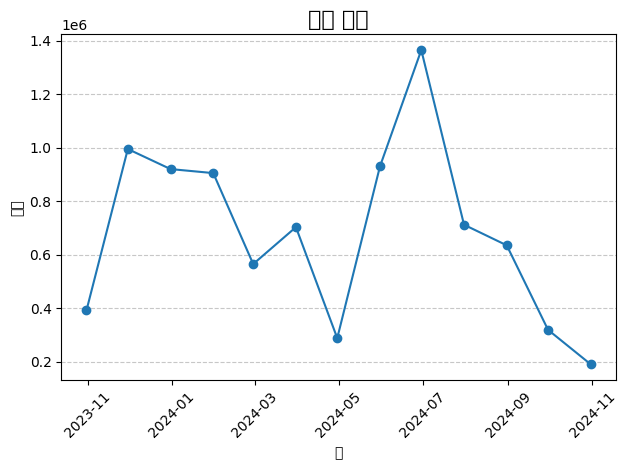

In [288]:
#시각화
plt.plot(monthly['date'], monthly['Sales'], marker='o')
plt.title('월별 매출', fontsize=16)
plt.xlabel('월')
plt.ylabel('매출')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [337]:
df = pd.read_csv('./data/ecommerce_sales_data.csv', encoding='euc-kr')

### 3

In [290]:
#카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
#매출 컬럼 생성
df['Sales'] = df['Price'] * df['Quantity']

In [291]:
#카테고리별 매출 집계
total_sales = df.groupby('Category')['Sales'].sum().reset_index()

In [292]:
#조건문으로 상위 3개 카테고리 추출
if len(total_sales) > 3:
    top_cats = total_sales.nlargest(3, 'Sales')
else:
    top_cats = total_sales



In [293]:
print(top_cats)

      Category    Sales
4         Food  1966000
3  Electronics  1746000
0       Beauty  1493000


### 4

In [294]:
#국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [295]:
#국가별 매출 집계
total_sales = df.groupby('Country')['Sales'].sum().reset_index()


In [296]:
#조건문으로 상위 5개 국가 추출
if len(total_sales) > 5:
    top_countries = total_sales.nlargest(5, 'Sales')
else:
    top_countries = total_sales

In [297]:
print(top_countries)

  Country    Sales
0    대한민국  1419000
1      독일  1973000
2      미국  2238000
3      일본  1523000
4      중국  1766000


3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

### 1

In [298]:
#고객별 매출 집계
total_sales = df.groupby('CustomerID')['Sales'].sum().reset_index()

In [299]:
#조건문으로 상위 5명 고객 추출
if len(total_sales) > 5:
    top_customers = total_sales.nlargest(5, 'Sales')
else:
    top_customers = total_sales

In [300]:
print(top_customers)

    CustomerID   Sales
0         1007  334000
33        1354  245000
16        1141  241000
69        1589  215000
74        1632  192000


### 2

In [301]:
#주문 횟수가 가장 많은 상위 5명의 고객을 출력

In [302]:
#주문 횟수 집계
total_orders = df.groupby('CustomerID')['OrderID'].nunique().reset_index()
total_orders.columns = ['CustomerID', 'OrderCount']

In [303]:
#조건문으로 상위 5명 고객 추출
if len(total_orders) > 5:
    top_customers = total_orders.nlargest(5, 'OrderCount')
else:
    top_customers = total_orders


In [304]:
print(top_customers)

    CustomerID  OrderCount
0         1007           2
3         1038           2
16        1141           2
22        1206           2
31        1278           2


## 3

In [305]:
#연령대 컬럼 추가
age_groups = {1: '10대', 
              2: '20대', 
              3: '30대', 
              4: '40대', 
              5: '50대'}
df['AgeGroup'] = np.random.choice(
                 list(age_groups.values()), size=len(df))



In [306]:
#연령대별, 카테고리별 구매 건수 집계
category_counts = df.groupby(['AgeGroup', 'Category'])['OrderID'].count().reset_index()
category_counts.columns = ['AgeGroup', 'Category', 'Count']

In [307]:
#연령대별 가장 많이 구매한 카테고리 추출
top_category = category_counts.loc[
               category_counts.groupby('AgeGroup')['Count'].idxmax()]

In [308]:
print(top_category)

   AgeGroup  Category  Count
1       10대     Books      7
8       20대  Clothing      7
12      30대    Beauty      7
23      40대    Sports      6
25      50대     Books      7


4. 
    1. **상품 분석**가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [309]:
!pip install matplotlib
!pip install numpy

- 파일 인코딩 과정이 계속 에러 나서 모듈문제확인
모듈해결방법 찾아봄.

In [310]:
## ModuleNotFoundError
!pip install chardet

In [311]:
import chardet

file_path = './data/ecommerce_sales_data.csv'  # 파일 경로를 지정하세요

# 파일의 인코딩 감지
with open(file_path, 'rb') as file:
    result = chardet.detect(file.read(10000))  # 파일의 일부를 읽어 인코딩 감지
    print(result)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


In [312]:
#필수라이부러리 선언
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [313]:
import pandas as pd

In [314]:
df = pd.read_csv('./data/ecommerce_sales_data.csv', encoding='cp949')

## 1

In [315]:
idx_max_sales = category_product_sales.groupby('Category')['Quantity'].idxmax()

In [316]:
#상품별 판매량 집계
product_sales = df.groupby('Product')['Quantity'].sum().reset_index()

In [317]:
#상위 5개 상품 추출 및 출력
top_5_products = product_sales.nlargest(5, 'Quantity')
print(top_5_products)

   Product  Quantity
8       셔츠        25
5      립스틱        22
9       소설        21
14     역사책        20
24      커피        20


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49492 (\N{HANGUL SYLLABLE SYEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52768 (\N{HANGUL SYLLABLE CEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_

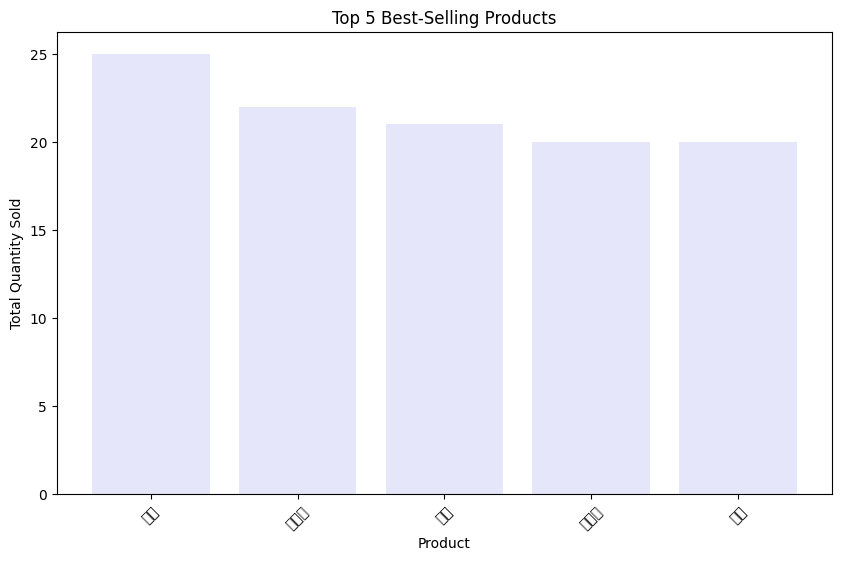

In [318]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_products['Product'], top_5_products['Quantity'], color='Lavender')
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

## 2

In [319]:
# 카테고리별 그룹화, 판매수량의 합계(최대값을 알아보기 위해) 
ategory_product_sales = df.groupby([
                        'Category', 'Product'])['Quantity'].sum().reset_index()

In [320]:
#카테고리별로 그룹화하고 사용자 정의 함수를 적용
top_products = df.groupby('Category').apply(
    get_top_selling_product).reset_index(drop=True)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\4279787861.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = df.groupby('Category').apply(


In [321]:
#그룹에서 가장 많이 판매된 상품을 반환하는 함수
def get_top_selling_product(group):
    return group.loc[group['Quantity'].idxmax()]

In [322]:
print(top_products)

   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0       35      향수       Beauty         5  18000        1640  1982-06-30   
1        1     역사책        Books         5  37000        1071  1980-08-08   
2        2      셔츠     Clothing         5  20000        1526  1967-08-09   
3       67   스마트워치  Electronics         5  16000        1392  1985-09-30   
4       21      주스         Food         5  21000        1078  1992-09-29   
5       26     자전거       Sports         5   7000        1156  1978-01-08   

          OrderDate Country  
0  2024/05/21 23:33      중국  
1  2024/06/10 17:18      미국  
2  2023/11/18 18:45      독일  
3  2024/03/01 13:50      중국  
4  2023/12/29 17:54      중국  
5  2024/05/10 12:22      일본  


## 3

In [323]:
#상품별 평균 구매 수량 계산
avg_quantity = df.groupby('Product')['Quantity'].mean()

In [324]:
#평균 구매 수량이 가장 높은 상위 3개 상품 추출
top3_products = avg_quantity.nlargest(3)

In [325]:
# 상위 3개 상품 출력
print(top3_products)

Product
자기계발    5.0
주스      5.0
요가매트    4.0
Name: Quantity, dtype: float64


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

## 1

In [326]:
# 계속 라이브러리 파일 인코딩에러로 계속 구문을 넣음
#필수라이부러리 선언
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [419]:
df.info()  # 데이터 구조 확인
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     120 non-null    int64         
 1   Product     120 non-null    object        
 2   Category    120 non-null    object        
 3   Quantity    120 non-null    int64         
 4   Price       120 non-null    int64         
 5   CustomerID  120 non-null    int64         
 6   Birthdate   120 non-null    object        
 7   OrderDate   120 non-null    datetime64[ns]
 8   Country     120 non-null    object        
 9   Week        120 non-null    period[W-SUN] 
dtypes: datetime64[ns](1), int64(4), object(4), period[W-SUN](1)
memory usage: 9.5+ KB


,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,Week
0,1,¿ª»çÃ¥,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,¹Ì±¹,2024-06-10/2024-06-16
1,2,¼ÅÃ÷,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,µ¶ÀÏ,2023-11-13/2023-11-19
2,3,³ëÆ®ºÏ,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,Áß±¹,2023-10-09/2023-10-15
3,4,ÀÚÀü°Å,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,ÀÏº»,2024-07-15/2024-07-21
4,5,ÇìµåÆù,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,´ëÇÑ¹Î±¹,2024-01-15/2024-01-21


In [533]:
df = pd.read_csv('./data/ecommerce_sales_data.csv', encoding='euc-kr')

In [421]:
# datetime 형식으로 변환
df = df.dropna(subset=['OrderDate'])
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [422]:
# 결측치 제거 (잘못된 날짜 제거)
df = df.dropna(subset=['OrderDate'])

In [423]:
#주별 매출액 계산을 위해 '주' 단위 추가
df['Week'] = df['OrderDate'].dt.to_period('W')
print(df.columns)

Index(['OrderID', 'Product', 'Category', 'Quantity', 'Price', 'CustomerID',
       'Birthdate', 'OrderDate', 'Country', 'Week'],
      dtype='object')


In [424]:
# 매출액 계산 (Quantity * UnitPrice)
df['Sales'] = df['Quantity'] * df['Price']
print(df.columns)

Index(['OrderID', 'Product', 'Category', 'Quantity', 'Price', 'CustomerID',
       'Birthdate', 'OrderDate', 'Country', 'Week', 'Sales'],
      dtype='object')


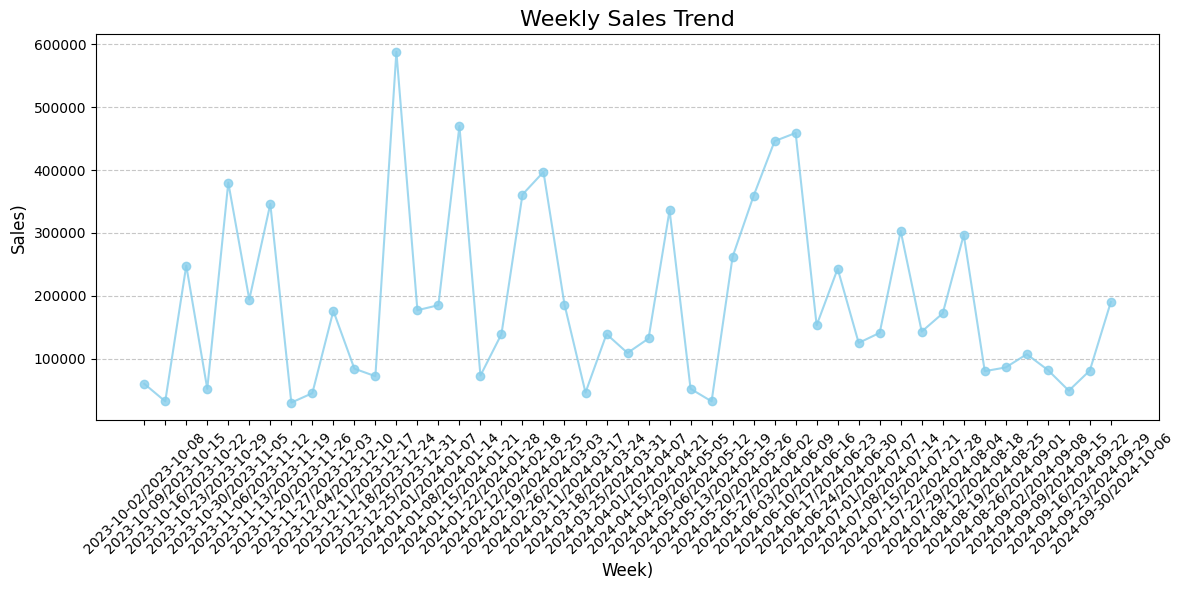

In [425]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Week'].astype(str), 
         weekly_sales['Sales'], marker='o',
         linestyle='-', color='skyblue', alpha=0.8)
plt.title('Weekly Sales Trend', fontsize=16)
plt.xlabel('Week)', fontsize=12)
plt.ylabel('Sales)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2

In [426]:
# 계속 라이브러리 파일 인코딩에러로 계속 구문을 넣음
#필수라이부러리 선언
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [427]:
print(df.head())

   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1  ¿ª»çÃ¥        Books         5  37000        1071  1980-08-08   
1        2    ¼ÅÃ÷     Clothing         5  20000        1526  1967-08-09   
2        3  ³ëÆ®ºÏ  Electronics         4   8000        1252  1973-04-07   
3        4  ÀÚÀü°Å       Sports         1   8000        1670  1970-04-08   
4        5  ÇìµåÆù  Electronics         3  26000        1838  1992-05-19   

            OrderDate   Country                   Week   Sales  
0 2024-06-10 17:18:00      ¹Ì±¹  2024-06-10/2024-06-16  185000  
1 2023-11-18 18:45:00      µ¶ÀÏ  2023-11-13/2023-11-19  100000  
2 2023-10-15 11:19:00      Áß±¹  2023-10-09/2023-10-15   32000  
3 2024-07-19 02:19:00      ÀÏº»  2024-07-15/2024-07-21    8000  
4 2024-01-20 20:34:00  ´ëÇÑ¹Î±¹  2024-01-15/2024-01-21   78000  


In [532]:
# 데이터 로드 및 전처리-utf8 은 계속 에러
df = pd.read_csv('./data/ecommerce_sales_data.csv', encoding='euc-kr')
print("데이터프레임의 열:", df.columns)  


데이터프레임의 열: Index(['OrderID', 'Product', 'Category', 'Quantity', 'Price', 'CustomerID',
       'Birthdate', 'OrderDate', 'Country'],
      dtype='object')


In [429]:
# 결측치 제거 (유효하지 않은 날짜 제거)
df = df.dropna(subset=['OrderDate'])

In [430]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [442]:
# 매출 계산 (새로운 열 추가)
df['Sales'] = df['Quantity'] * df['Price']
df.columns

Index(['OrderID', 'Product', 'Category', 'Quantity', 'Price', 'CustomerID',
       'Birthdate', 'OrderDate', 'Country', 'Sales'],
      dtype='object')

In [443]:
#특정 기간 필터링 코드
filtered_data = df.query("'2023-01-01' <= OrderDate <= '2024-09-30'")
print(filtered_data)

     OrderID       Product     Category  Quantity  Price  CustomerID  \
1          2          ¼ÅÃ÷     Clothing         5  20000        1526   
2          3        ³ëÆ®ºÏ  Electronics         4   8000        1252   
6          7          Çâ¼ö       Beauty         1  20000        1093   
7          8        ¸³½ºÆ½       Beauty         3  15000        1500   
9         10          ¼¤Çª       Beauty         2  17000        1914   
14        15      ½º¸¶Æ®Æù  Electronics         2  18000        1206   
17        18        Ãà±¸°ø       Sports         2  29000        1271   
18        19        Ãà±¸°ø       Sports         1   9000        1398   
19        20          °úÀÚ         Food         1  14000        1418   
20        21          ÁÖ½º         Food         5  21000        1078   
24        25        ³ëÆ®ºÏ  Electronics         3  50000        1982   
26        27          °úÀÚ         Food         2  23000        1221   
32        33        ÃÊÄÝ¸´         Food         5  47000        

In [444]:
# 날짜별 매출 집계
daily_sales = filtered_data.groupby('OrderDate')['Sales'].sum()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1402746493.py:15: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1402746493.py:15: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1402746493.py:15: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1402746493.py:15: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


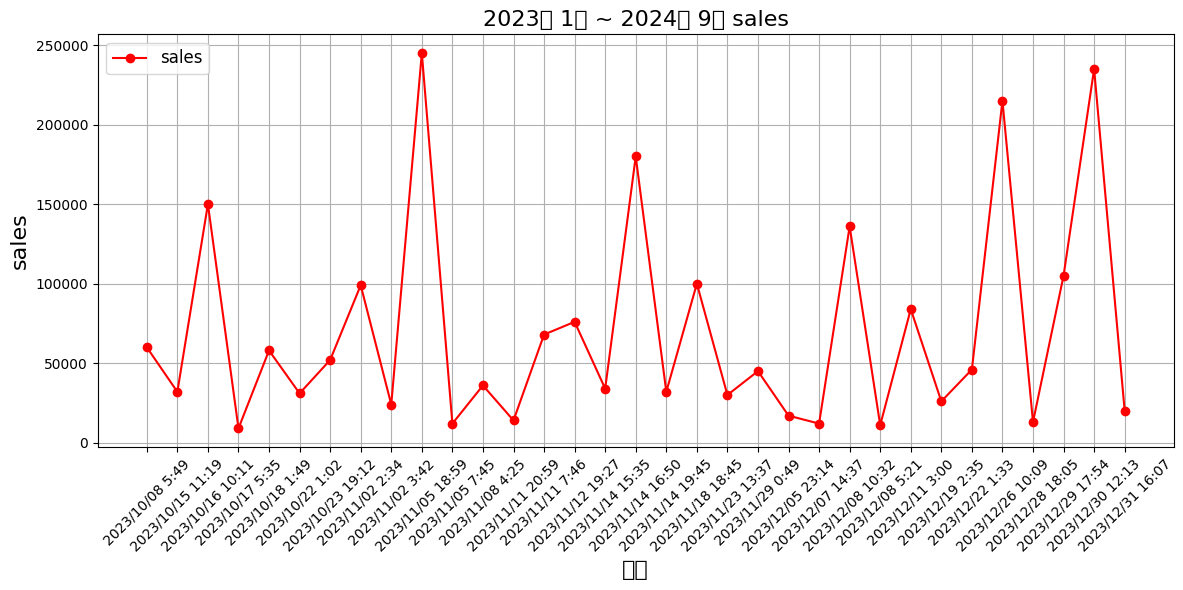

In [449]:
# 4. 시각화 (매출 추이 꺾은선 그래프)
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, 
         daily_sales.
         values, 
         marker='o', color='red', label='sales')

# 그래프 꾸미기
plt.title('2023년 1월 ~ 2024년 9월 sales', fontsize=16)
plt.xlabel('날짜', fontsize=16)
plt.ylabel('sales', fontsize=16)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


## 3

In [497]:
!pip install matplotlib
!pip install numpy

In [498]:
# 라이브러리 선언문
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [516]:
!pip install chardet


In [521]:
#데이터 로드
df = pd.read_csv('./data/ecommerce_sales_data.csv',encoding='euc-kr')


In [522]:
# 데이터 전처리
df['OrderDate'] = pd.to_datetime(df['OrderDate'])  # 날짜 변환
df['Hour'] = df['OrderDate'].dt.hour  # 시간 추출

In [523]:
# 'OrderDate' 열을 datetime 형식으로 변환
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
print(df.head())  # 상위 5개 데이터 확인
print(df.columns)


   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

            OrderDate Country  Hour  
0 2024-06-10 17:18:00      미국    17  
1 2023-11-18 18:45:00      독일    18  
2 2023-10-15 11:19:00      중국    11  
3 2024-07-19 02:19:00      일본     2  
4 2024-01-20 20:34:00    대한민국    20  
Index(['OrderID', 'Product', 'Category', 'Quantity', 'Price', 'CustomerID',
       'Birthdate', 'OrderDate', 'Country', 'Hour'],
      dtype='object')


In [524]:
# 특정 국가 리스트
countries = ["대한민국","일본", "중국"]  # 분석할 3개 국가
print(df.head())  # 상위 5개 데이터 확인
print(df.columns)

   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

            OrderDate Country  Hour  
0 2024-06-10 17:18:00      미국    17  
1 2023-11-18 18:45:00      독일    18  
2 2023-10-15 11:19:00      중국    11  
3 2024-07-19 02:19:00      일본     2  
4 2024-01-20 20:34:00    대한민국    20  
Index(['OrderID', 'Product', 'Category', 'Quantity', 'Price', 'CustomerID',
       'Birthdate', 'OrderDate', 'Country', 'Hour'],
      dtype='object')


In [525]:
# 데이터 필터링: 선택한 국가에 해당하는 데이터만
filtered_df = df[df['Country'].isin(countries)]

C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1457408466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hour'] = filtered_df['OrderDate'].dt.hour
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1457408466.py:21: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1457408466.py:21: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1457408466.py:21: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_29064\1

<Figure size 1200x600 with 0 Axes>

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_e

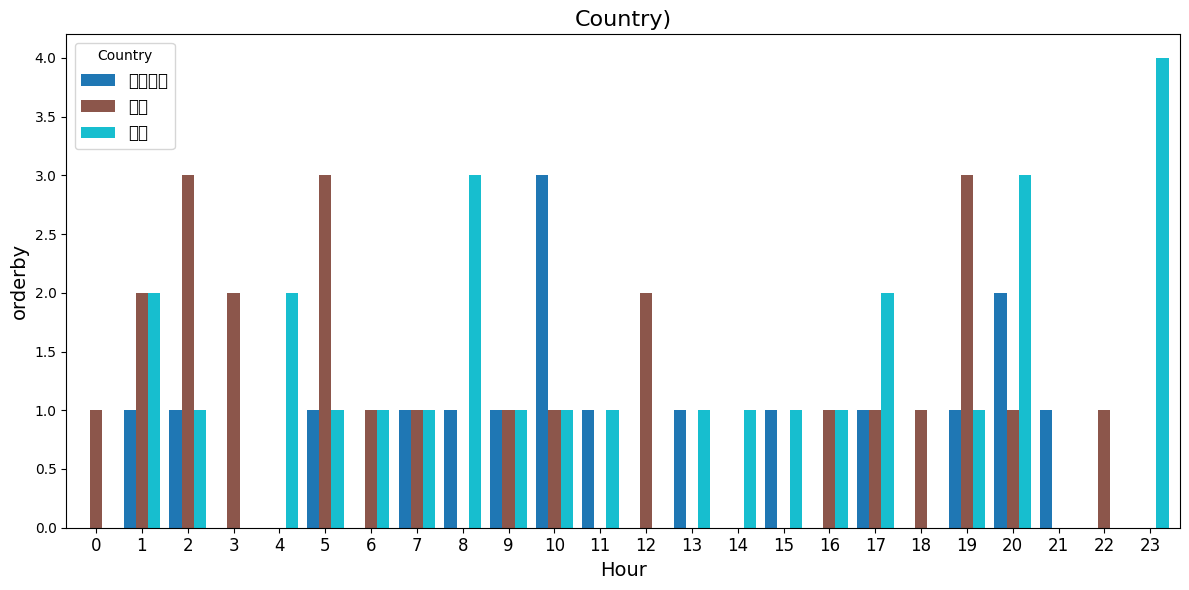

In [531]:
# 필터링된 데이터가 없을 경우 처리
if filtered_df.empty:
    print("텅!")
else:
     # 시간대 추출
    filtered_df['Hour'] = filtered_df['OrderDate'].dt.hour

    # 시간대별 주문 건수 집계 (국가별로)
    hourly_orders = filtered_df.groupby(['Country', 'Hour'])['OrderID'].count().unstack(level=0, fill_value=0)

    # 막대그래프 시각화
    plt.figure(figsize=(12, 6))
    hourly_orders.plot(kind='bar', figsize=(12, 6), colormap='tab10', width=0.8)

    # 그래프 꾸미기
    plt.title("Country)", fontsize=16)
    plt.xlabel("Hour", fontsize=14)
    plt.ylabel("orderby", fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.legend(title="Country", fontsize=12)
    plt.tight_layout()

    # 그래프 출력
    plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

## 1

In [350]:
#필수라이부러리 선언
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [351]:
# 데이터의 첫 몇 행 확인
print(df.head())

# 결측치 확인
print(df.isnull().sum())

# 결측치 처리 (예: 제거)
df = df.dropna()

   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1  ¿ª»çÃ¥        Books         5  37000        1071  1980-08-08   
1        2    ¼ÅÃ÷     Clothing         5  20000        1526  1967-08-09   
2        3  ³ëÆ®ºÏ  Electronics         4   8000        1252  1973-04-07   
3        4  ÀÚÀü°Å       Sports         1   8000        1670  1970-04-08   
4        5  ÇìµåÆù  Electronics         3  26000        1838  1992-05-19   

            OrderDate   Country  
0 2024-06-10 17:18:00      ¹Ì±¹  
1 2023-11-18 18:45:00      µ¶ÀÏ  
2 2023-10-15 11:19:00      Áß±¹  
3 2024-07-19 02:19:00      ÀÏº»  
4 2024-01-20 20:34:00  ´ëÇÑ¹Î±¹  
OrderID       0
Product       0
Category      0
Quantity      0
Price         0
CustomerID    0
Birthdate     0
OrderDate     0
Country       0
dtype: int64


In [178]:
# 고객별 주문 횟수 계산
customer_orders = df.groupby('CustomerID')['OrderID'].nunique()
print(df.columns)

Index(['OrderID', 'Product', 'Category', 'Quantity', 'Price', 'CustomerID',
       'Birthdate', 'OrderDate', 'Country'],
      dtype='object')


In [179]:
# 재구매 고객 수 (2회 이상 주문한 고객)
repeat_customers = customer_orders[customer_orders > 1].count()

# 전체 고객 수
total_customers = customer_orders.count()

In [180]:
# 재구매율 계산
repurchase_rate = repeat_customers / total_customers
print(f'Repurchase Rate: {repurchase_rate:.2%}')

Repurchase Rate: 8.11%


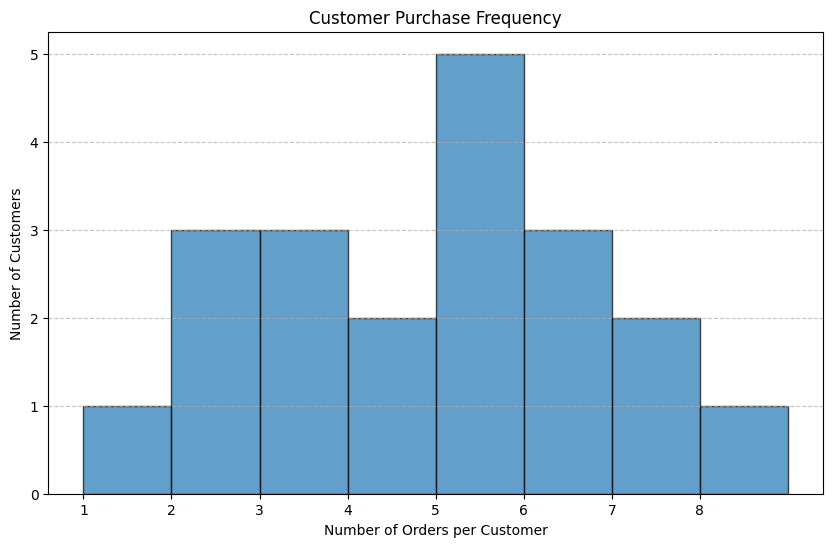

In [ ]:
#시각화
plt.figure(figsize=(10, 6))
plt.hist(customer_orders, bins=range(1, max(customer_orders) + 2), edgecolor='black', alpha=0.7)
plt.title('Customer Purchase Frequency')  # 고객 구매 빈도
plt.xlabel('Number of Orders per Customer')  # 고객별 주문 횟수
plt.ylabel('Number of Customers')  # 고객 수
plt.xticks(range(1, max(customer_orders) + 1))  # x축 눈금
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 2

In [186]:
# 데이터 확인
print("컬럼명:", df.columns)  # 컬럼명 확인
print(df.head())  # 첫 몇 행 확인

컬럼명: Index(['OrderID', 'Product', 'Category', 'Quantity', 'Price', 'CustomerID',
       'Birthdate', 'OrderDate', 'Country'],
      dtype='object')
   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

          OrderDate Country  
0  2024/06/10 17:18      미국  
1  2023/11/18 18:45      독일  
2  2023/10/15 11:19      중국  
3   2024/07/19 2:19      일본  
4  2024/01/20 20:34    대한민국  


In [196]:
import os
print(os.getcwd())

c:\here\python_basic\data-analysis-practice-main


In [230]:
#필수라이부러리 선언
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [231]:
f = pd.read_csv('./data/ecommerce_sales_data.csv', encoding='ISO-8859-1')

In [232]:
df['Discount'] = 0.1  # 할인율 10%

In [233]:
#할인 적용된 매출액 계산
df['Sales'] = df['Price'] * df['Quantity'] 
df['DiscountedSales'] = df['Sales'] * (1 - df['Discount'])  

In [235]:
#카테고리별 매출 합계와 평균 할인율 계산
category_summary = df.groupby(
    'Category')[['DiscountedSales', 'Discount']].mean()  

# 카테고리별 평균 매출과 할인율 계산
category_summary = category_summary.sort_values(
    by='DiscountedSales', ascending=False)  # 매출 기준 정렬

print(category_summary)


             DiscountedSales  Discount
Category                              
Electronics     82705.263158       0.1
Food            76930.434783       0.1
Clothing        76740.000000       0.1
Beauty          58421.739130       0.1
Books           56372.727273       0.1
Sports          52850.000000       0.1


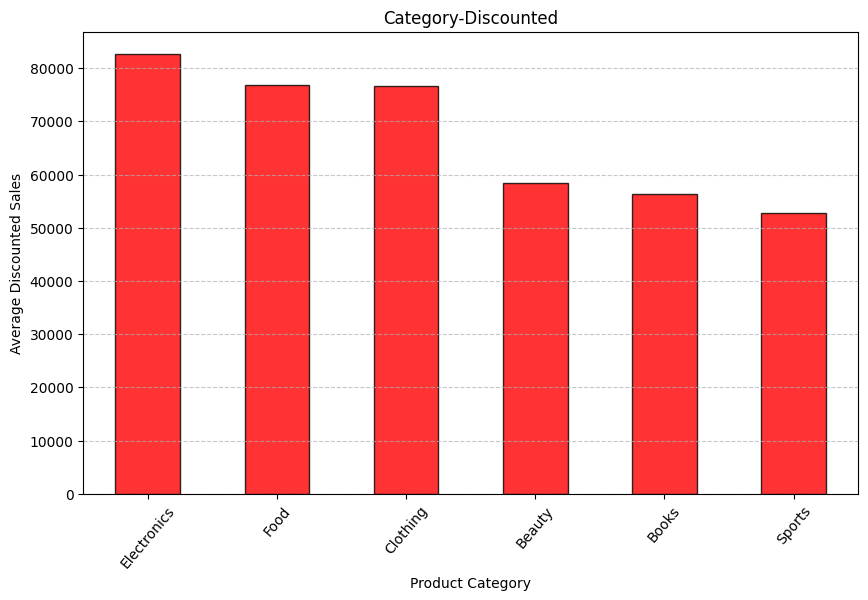

In [237]:
##시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
category_summary['DiscountedSales'].plot(
                  kind='bar', color='red', edgecolor='black', alpha=0.8)
plt.title('Category-Discounted')  # 평균매출 및 평균 할인율
plt.xlabel('Product Category')  # 상품 카테고리별
plt.ylabel('Average Discounted Sales')  # 평균할인매출액
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()